<h1><center>Data Analysis</center></h1>
<h2><center>Kaggle report notebook</center></h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Наша команда


### Наша команда называется "cb vs all". Члены команды: Екатерина Тимофеева, Павел Антонов и Антон Вахрушин.

# Загрузка, анализ и подготовка данных

In [2]:
train = pd.read_csv('./data/train.tsv.gz', sep='\t', index_col=0)
test_ = pd.read_csv('./data/test.tsv.gz', sep='\t', index_col=0)

In [3]:
train.columns

Index(['category_id', 'city', 'date_created', 'delivery_available',
       'desc_text', 'img_num', 'lat', 'long', 'name_text', 'owner_id',
       'payment_available', 'price', 'product_id', 'product_type',
       'properties', 'region', 'sold_mode', 'subcategory_id', 'sold_fast'],
      dtype='object')

In [4]:
train.head(5)

,category_id,city,date_created,delivery_available,desc_text,img_num,lat,long,name_text,owner_id,payment_available,price,product_id,product_type,properties,region,sold_mode,subcategory_id,sold_fast
1,4,Краснодар,2018-10-08,False,"Продаю стол раскладной, деревянный, советский ...",3,45.0686,38.9518,Стол,4ce583fe8231a0cc4a3c7d241c7d0289,True,500.0,8cb80c05c65c210275f5500779d6b593,1,"[{'slug_id': 'stoly_stulya_tip', 'slug_name': ...",Краснодарский край,1,410,1
2,4,Тюмень,2018-06-18,False,"Тарелки глубокие 6 шт. Блюдца, чашки по 6 шт. ...",2,57.1840,65.5674,Посуда,e58be2c8f143c17246dc2243b5d3b98f,False,300.0,3b7a9f8b27a53b63525f95bc8070abb2,1,"[{'slug_id': 'dom_dacha_posuda_tip', 'slug_nam...",Тюменская область,1,405,0
4,9,Омск,2018-07-31,True,"Новый,с этикеткой. Размер L. Не подошёл по раз...",1,54.9889,73.4312,Костюм,51b408796027214232532b7e478e2159,True,1100.0,c97dd9c5a3e938c52cf5d7822bc0eb7b,1,[{'slug_id': 'zhenskaya_odezhda_pidzhaki_kosty...,Омская область,1,908,0
6,3,Санкт-Петербург,2018-04-17,False,"Складывается тростью, все колеса вниз. Сплошна...",4,59.9590,30.4877,Коляска,6544b83acbbf04439a7ba983093cafb4,True,5000.0,3e5d0286b25fd7f62f88bc436a59ae4e,1,"[{'slug_id': 'waggon_type', 'slug_name': 'Тип'...",Ленинградская область,1,312,0
10,5,Москва,2018-02-09,False,"Неразлучники, птичкам по 1,5 года. Продаю с бо...",2,55.6473,37.4118,Волнистые попугаи,ea575e28daf1f47bfce63015cd3ce5cf,True,2000.0,57b4a8679d0d3eb1e31367b57221098f,1,[],Московская область,1,504,0


In [5]:
from sklearn.model_selection import train_test_split

# Результаты показали, что после тестирования модели на тестовой выборке, лучше её обучить на полном наборе данных, что увеличивало score. 
# Поэтому здесь(в итоговой версии) мы делаем сплит на тренировочную и тестовую выборку, с фактическим отсутсвием тестовой выборки
X_train, X_test, y_train, y_test = train_test_split(train, train['sold_fast'], test_size=0.0, random_state=42)

### Мы сразу заметили, что 2 признака не имеет смысла использовать в итоговой модели: Unnamed - по сути, индекс, а properties - очень сложный и местами отсутсвующий признак.

In [6]:
X_train.drop(['properties'], axis=1, inplace=True)
X_test.drop(['properties'], axis=1, inplace=True)

/Users/andrey.shestakov/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### Затем мы преобразовали дату, оставив только год и удалили целевую переменную из признаков.

In [7]:
X_train['date_created'] = X_train['date_created'].apply(lambda a : int(a[:4]))
X_test['date_created'] = X_test['date_created'].apply(lambda a : int(a[:4]))

/Users/andrey.shestakov/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Потом посмотрели на корреляцию данных. Заметили, что категория и подкатегория - хорошо коррелируют, что, в теории, плохо сказывается на линейных моделях. Тем не менее, эксперимент показал, что лучше оставить оба признкака.

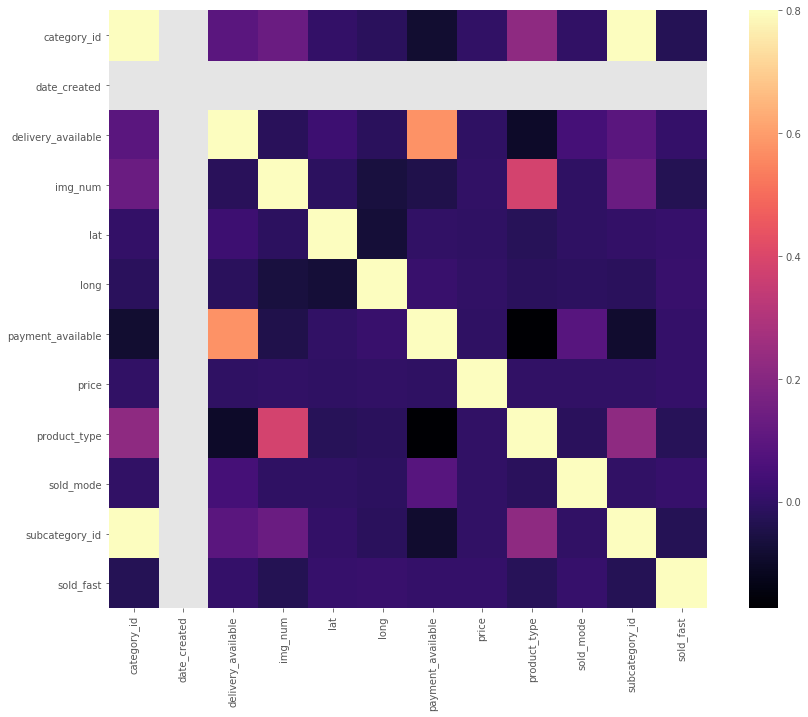

In [8]:
import seaborn as sns

corr = X_train.corr()
plt.figure(figsize=(15, 11))
sns.heatmap(corr, vmax=.8, square=True, cmap='magma')

### Так как наша итоговая модель состоит из композиции двух: градиентного бустинга над решающими деревьями и логистической регрессии, которые обучаются на разных подмножествах признаков, нужно разделить выборку на 2: для логистической регрессии мы обработаем тексты (в качестве представления будем использовать TF-IDF) и удалим категориальные признаки, для бустинга, наоборот, удалим тексты, но оставим категориальные признаки. Кроме того, мы отмасштабировали признаки для регрессии, ведь и в теории и на практике, так она работает лучше.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.preprocessing import StandardScaler

vectorizer = TfidfVectorizer()
texts = vectorizer.fit_transform(X_train['desc_text'] + ' ' + X_train['name_text'])

X_train_without_cat = X_train.drop(['city', 'owner_id', 'product_id', 'region', 'desc_text', 'name_text'], 1, inplace=False)
X_train.drop(['desc_text', 'name_text'], 1, inplace=True)
scaler = StandardScaler()
x_train_without_cat = scaler.fit_transform(X_train_without_cat)
x_train_without_cat = hstack([np.array(x_train_without_cat, dtype=np.float64), texts])

y_tr = np.array(y_train)
y_test = np.array(y_test)

/Users/andrey.shestakov/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/andrey.shestakov/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/andrey.shestakov/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Наша модель

###  Как уже было сказано выше, наша итоговая модель состоит из двух: градиентного бустинга над решающими деревьями и логистической регрессии. Выбор такой конфигурации обосновывался следующим: в данных много категориальных признаков, с которыми хорошо справляются методы, основанные на деревьях (в частности, очень хорошо справляется с такими данными библиотека CatBoost). Вообще, деревья показывают себя зачастую лучше линейных моделей, так как могут разделять пространство на более сложные области, нежели чем линейные модели. Почему же мы использовали ещё и логистическую регрессию? Дело в том, что CatBoost пока ещё не умеет работать со sparse-объектами, которые получаются на выходе из TF-IDF, а если выход TF-IDF преобразовать в обычную матрицу, то возникает ошибка памяти. Дополнительно, мы знали, что логистическая регрессия очень хорошо зачастую себя проявляет на различных эмбеддингах текстов. Поэтому было принято решение обучать 2 модели, работающие на разных признаках. 
### Весь цикл обучения проводился в kernel на Kaggle (так было удобнее, потому что там есть возможность обучать дерево на GPU, что заметно ускоряет работу, более того, оттуда удобно делать посылки - отправлять файл, полученный в результате работы kernel'а).

In [12]:
import catboost as cb
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
# import lightgbm as lgb


model_texts = LogisticRegression()
model_cat = CatBoostRegressor(num_trees=2500, task_type="CPU", cat_features=['city', 'owner_id', 'product_id', 'subcategory_id', 'region', 'category_id'])
model_cat.fit(X_train, y_tr)
model_texts.fit(x_train_without_cat, y_train)

0:	learn: 0.4660207	total: 431ms	remaining: 17m 57s
1:	learn: 0.4520422	total: 609ms	remaining: 12m 40s
2:	learn: 0.4384814	total: 679ms	remaining: 9m 25s
3:	learn: 0.4253288	total: 960ms	remaining: 9m 58s
4:	learn: 0.4125699	total: 1.32s	remaining: 11m 1s
5:	learn: 0.4001958	total: 1.65s	remaining: 11m 26s
6:	learn: 0.3881908	total: 1.75s	remaining: 10m 23s
7:	learn: 0.3765475	total: 2.09s	remaining: 10m 51s
8:	learn: 0.3652515	total: 2.19s	remaining: 10m 5s
9:	learn: 0.3542969	total: 2.51s	remaining: 10m 25s
10:	learn: 0.3436684	total: 2.56s	remaining: 9m 40s
11:	learn: 0.3333605	total: 2.71s	remaining: 9m 22s
12:	learn: 0.3233665	total: 3.09s	remaining: 9m 51s
13:	learn: 0.3136659	total: 3.17s	remaining: 9m 22s
14:	learn: 0.3042563	total: 3.22s	remaining: 8m 53s
15:	learn: 0.2951293	total: 3.33s	remaining: 8m 37s
16:	learn: 0.2862783	total: 3.51s	remaining: 8m 32s
17:	learn: 0.2776923	total: 3.76s	remaining: 8m 39s
18:	learn: 0.2693634	total: 3.94s	remaining: 8m 34s
19:	learn: 0.261

159:	learn: 0.0037006	total: 36.3s	remaining: 8m 50s
160:	learn: 0.0035907	total: 36.6s	remaining: 8m 51s
161:	learn: 0.0034841	total: 36.8s	remaining: 8m 51s
162:	learn: 0.0033809	total: 37s	remaining: 8m 49s
163:	learn: 0.0032807	total: 37.2s	remaining: 8m 49s
164:	learn: 0.0031834	total: 37.3s	remaining: 8m 48s
165:	learn: 0.0030891	total: 37.4s	remaining: 8m 46s
166:	learn: 0.0029977	total: 37.6s	remaining: 8m 44s
167:	learn: 0.0029091	total: 37.7s	remaining: 8m 43s
168:	learn: 0.0028230	total: 38s	remaining: 8m 43s
169:	learn: 0.0027397	total: 38.3s	remaining: 8m 45s
170:	learn: 0.0026589	total: 38.6s	remaining: 8m 46s
171:	learn: 0.0025804	total: 39s	remaining: 8m 48s
172:	learn: 0.0025043	total: 39.2s	remaining: 8m 47s
173:	learn: 0.0024306	total: 39.4s	remaining: 8m 46s
174:	learn: 0.0023591	total: 39.6s	remaining: 8m 45s
175:	learn: 0.0022896	total: 39.8s	remaining: 8m 45s
176:	learn: 0.0022225	total: 40s	remaining: 8m 45s
177:	learn: 0.0021574	total: 40.2s	remaining: 8m 44s
1

317:	learn: 0.0001883	total: 1m 8s	remaining: 7m 52s
318:	learn: 0.0001879	total: 1m 9s	remaining: 7m 53s
319:	learn: 0.0001873	total: 1m 9s	remaining: 7m 54s
320:	learn: 0.0001869	total: 1m 9s	remaining: 7m 55s
321:	learn: 0.0001865	total: 1m 10s	remaining: 7m 54s
322:	learn: 0.0001858	total: 1m 10s	remaining: 7m 55s
323:	learn: 0.0001855	total: 1m 10s	remaining: 7m 55s
324:	learn: 0.0001851	total: 1m 11s	remaining: 7m 56s
325:	learn: 0.0001846	total: 1m 11s	remaining: 7m 57s
326:	learn: 0.0001843	total: 1m 11s	remaining: 7m 57s
327:	learn: 0.0001839	total: 1m 12s	remaining: 7m 58s
328:	learn: 0.0001835	total: 1m 12s	remaining: 7m 57s
329:	learn: 0.0001832	total: 1m 12s	remaining: 7m 58s
330:	learn: 0.0001828	total: 1m 13s	remaining: 7m 59s
331:	learn: 0.0001823	total: 1m 13s	remaining: 8m
332:	learn: 0.0001820	total: 1m 13s	remaining: 8m
333:	learn: 0.0001817	total: 1m 14s	remaining: 8m
334:	learn: 0.0001814	total: 1m 14s	remaining: 8m
335:	learn: 0.0001809	total: 1m 14s	remaining: 8

470:	learn: 0.0001582	total: 1m 58s	remaining: 8m 28s
471:	learn: 0.0001580	total: 1m 58s	remaining: 8m 29s
472:	learn: 0.0001579	total: 1m 58s	remaining: 8m 29s
473:	learn: 0.0001578	total: 1m 59s	remaining: 8m 28s
474:	learn: 0.0001577	total: 1m 59s	remaining: 8m 28s
475:	learn: 0.0001577	total: 1m 59s	remaining: 8m 29s
476:	learn: 0.0001575	total: 2m	remaining: 8m 29s
477:	learn: 0.0001574	total: 2m	remaining: 8m 28s
478:	learn: 0.0001573	total: 2m	remaining: 8m 29s
479:	learn: 0.0001572	total: 2m 1s	remaining: 8m 29s
480:	learn: 0.0001569	total: 2m 1s	remaining: 8m 29s
481:	learn: 0.0001569	total: 2m 1s	remaining: 8m 29s
482:	learn: 0.0001569	total: 2m 1s	remaining: 8m 28s
483:	learn: 0.0001567	total: 2m 2s	remaining: 8m 28s
484:	learn: 0.0001566	total: 2m 2s	remaining: 8m 28s
485:	learn: 0.0001564	total: 2m 2s	remaining: 8m 28s
486:	learn: 0.0001562	total: 2m 3s	remaining: 8m 28s
487:	learn: 0.0001562	total: 2m 3s	remaining: 8m 28s
488:	learn: 0.0001561	total: 2m 3s	remaining: 8m 

623:	learn: 0.0001414	total: 2m 49s	remaining: 8m 30s
624:	learn: 0.0001413	total: 2m 50s	remaining: 8m 31s
625:	learn: 0.0001412	total: 2m 50s	remaining: 8m 31s
626:	learn: 0.0001411	total: 2m 51s	remaining: 8m 31s
627:	learn: 0.0001411	total: 2m 51s	remaining: 8m 31s
628:	learn: 0.0001411	total: 2m 51s	remaining: 8m 31s
629:	learn: 0.0001409	total: 2m 52s	remaining: 8m 31s
630:	learn: 0.0001407	total: 2m 52s	remaining: 8m 31s
631:	learn: 0.0001405	total: 2m 53s	remaining: 8m 31s
632:	learn: 0.0001405	total: 2m 53s	remaining: 8m 32s
633:	learn: 0.0001404	total: 2m 54s	remaining: 8m 32s
634:	learn: 0.0001403	total: 2m 54s	remaining: 8m 32s
635:	learn: 0.0001401	total: 2m 54s	remaining: 8m 32s
636:	learn: 0.0001401	total: 2m 55s	remaining: 8m 32s
637:	learn: 0.0001400	total: 2m 55s	remaining: 8m 31s
638:	learn: 0.0001398	total: 2m 55s	remaining: 8m 31s
639:	learn: 0.0001398	total: 2m 55s	remaining: 8m 31s
640:	learn: 0.0001397	total: 2m 56s	remaining: 8m 30s
641:	learn: 0.0001396	total:

777:	learn: 0.0001279	total: 3m 31s	remaining: 7m 47s
778:	learn: 0.0001277	total: 3m 31s	remaining: 7m 47s
779:	learn: 0.0001277	total: 3m 32s	remaining: 7m 47s
780:	learn: 0.0001277	total: 3m 32s	remaining: 7m 47s
781:	learn: 0.0001276	total: 3m 32s	remaining: 7m 46s
782:	learn: 0.0001276	total: 3m 32s	remaining: 7m 46s
783:	learn: 0.0001275	total: 3m 32s	remaining: 7m 45s
784:	learn: 0.0001275	total: 3m 33s	remaining: 7m 45s
785:	learn: 0.0001274	total: 3m 33s	remaining: 7m 45s
786:	learn: 0.0001273	total: 3m 33s	remaining: 7m 44s
787:	learn: 0.0001272	total: 3m 33s	remaining: 7m 44s
788:	learn: 0.0001271	total: 3m 34s	remaining: 7m 44s
789:	learn: 0.0001271	total: 3m 34s	remaining: 7m 43s
790:	learn: 0.0001271	total: 3m 34s	remaining: 7m 43s
791:	learn: 0.0001270	total: 3m 34s	remaining: 7m 43s
792:	learn: 0.0001269	total: 3m 35s	remaining: 7m 42s
793:	learn: 0.0001267	total: 3m 35s	remaining: 7m 42s
794:	learn: 0.0001266	total: 3m 35s	remaining: 7m 42s
795:	learn: 0.0001265	total:

KeyboardInterrupt: 

### Ещё здесь можно заметить, что мы использовали CatBoostRegressor, а не Classifier. Это связано с тем, что иногда регрессия "выучивает" дополнительную информацию, связанную с порядком данных. Мы провели эксперимент и выяснили, что в этой задаче лучше себя показывает именно Regressor.

### Ну и наконец, обработка данных, для которых нужно сделать предсказания и сами предсказания, которые записываются в файл "output.csv"

In [ ]:
unknown_cat = test_.drop(['Unnamed: 0', 'properties'], 1)
unknown_cat['date_created'] = unknown_cat['date_created'].apply(lambda a : int(a[:4]))
unknown_cat.drop(['desc_text', 'name_text'], 1, inplace=True)
unknown_texts = test_.drop(['Unnamed: 0', 'properties'], axis=1)
unknown_texts['date_created'] = unknown_texts['date_created'].apply(lambda a : int(a[:4]))
unknown_texts.drop(['city', 'owner_id', 'product_id', 'region', 'desc_text', 'name_text'], 1, inplace=True)
test_texts = vectorizer.transform(test_['desc_text'] + ' ' + test_['name_text'])
scaler = StandardScaler()
unknown_texts_ = scaler.fit_transform(unknown_texts)
unknown_texts_ = hstack([np.array(unknown_texts_, dtype=float64), test_texts])

predictions_cat = model_cat.predict(unknown_cat)
predictions_texts = model_texts.predict_proba(unknown_texts_)[:,1]

ids = test_['product_id']

output = {'product_id': [], 'score': []}
for i in range(len(predictions_cat)):
    output['product_id'].append(ids[i])
    output['score'].append((predictions_texts[i] * 0.5 + predictions_cat[i] * 0.5) if predictions_texts[i] + predictions_cat[i] >= 0. else 0.0000001)
pd.DataFrame(output).to_csv('output.csv', index=False)

# Итоговый результат

### В итоге наша модель набирает 0.62651 на публичном лидерборде (занимая 5 место) и 0.62942 на приватном (занимая уже 4 место).

# Что ещё мы пробовали?

### Мы пробовали вместо логистической регрессии использовать модель LightGBM, но она показала результат хуже. Так же пробовали сделать стекинг моделей (и в качестве итогововго алгоритма пробовали разных кандидатов: как линейную регрессию, так и решающие деревья). Пробовали перейти в новое признаковое пространство для логистической регрессии, добавив полиномиальных признаков, но это ухудшало результат.